### Importing Packages

In [1]:
from jupyterthemes import jtplot
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy.stats import zscore
import datetime as dt

from imblearn.under_sampling import NearMiss
from sklearn.model_selection import train_test_split, RandomizedSearchCV,GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, accuracy_score, confusion_matrix

%matplotlib inline


jtplot.style(theme='monokai', grid=False)

### Loading & Feature extraction 

In [2]:
df=pd.read_csv('./Fault_Classification/Dataset_assignment.csv', parse_dates=['date_time'])

# Spelling error in Fault_name (Message Faukt 1---> Message Fault 1)
df.fault_name.replace('Message Faukt 1', 'Message Fault 1', inplace=True)

#Features from date_time
df['Month'] = df['date_time'].dt.month
df['Year'] = df['date_time'].dt.year
df['Day'] = df['date_time'].dt.day
df['Hour'] = df['date_time'].dt.hour
df['Minute'] = df['date_time'].dt.minute
#df.drop('date_time', axis=1, inplace=True)

df



,date_time,device_id,factor1,factor2,factor3,factor4,factor5,factor6,factor7,fault_name,fault_class,Month,Year,Day,Hour,Minute
0,2018-01-18 08:00:00,1,27.2,60.000000,39.5,706.1,172.800000,8.200000,0.000000,Inverter Status Alarm,no,1,2018,18,8,0
1,2018-01-18 17:15:00,1,26.2,101.000000,37.4,736.2,169.633333,20.600000,0.000000,Inverter Status Alarm,no,1,2018,18,17,15
2,2018-01-19 08:30:00,1,31.3,55.000000,45.9,720.0,172.700000,7.700000,1.000000,Inverter Status Alarm,no,1,2018,19,8,30
3,2018-01-19 17:15:00,1,31.3,114.000000,43.3,764.4,170.900000,18.800000,1.000000,Inverter Status Alarm,no,1,2018,19,17,15
4,2018-01-19 17:30:00,1,15.5,54.000000,24.0,684.8,170.466667,17.000000,1.000000,Inverter Status Alarm,no,1,2018,19,17,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9124,2020-11-16 07:35:00,14,22.8,56.094181,35.9,655.0,170.400000,14.452000,0.862351,Inverter Status Alarm,no,11,2020,16,7,35
9125,2020-11-17 16:10:00,14,118.2,306.764893,168.1,731.8,173.166667,23.250999,1.813309,Inverter Status Alarm,no,11,2020,17,16,10
9126,2020-11-17 16:50:00,14,27.5,92.731743,40.7,715.9,174.300000,22.038000,0.872815,Inverter Status Alarm,no,11,2020,17,16,50
9127,2020-11-18 07:20:00,14,15.9,61.309731,26.7,614.4,171.566667,6.875000,0.845742,Inverter Status Alarm,no,11,2020,18,7,20


In [3]:
df.describe()

,device_id,factor1,factor2,factor3,factor4,factor5,factor6,factor7,Month,Year,Day,Hour,Minute
count,9129.000000,9129.000000,9129.000000,9129.000000,9129.000000,9129.000000,9129.000000,9129.000000,9129.000000,9129.000000,9129.00000,9129.000000,9129.00000
mean,7.233761,54.741735,154.938482,87.699332,676.171957,170.753142,21.333339,1.005273,6.590974,2018.954760,15.54650,11.820900,28.55132
std,4.095769,100.749219,219.446696,163.206848,74.971298,10.132396,9.890684,0.830040,3.668008,0.805758,8.58217,4.729494,17.38527
min,1.000000,0.000000,50.000000,0.100000,0.100000,0.000000,0.641000,0.000000,1.000000,2018.000000,1.00000,6.000000,0.00000
25%,3.000000,21.400000,55.919128,33.500000,637.600000,169.733333,13.567000,0.691763,3.000000,2018.000000,9.00000,7.000000,15.00000
50%,7.000000,27.800000,64.687233,44.400000,661.800000,171.200000,21.636000,0.717357,7.000000,2019.000000,16.00000,11.000000,30.00000
75%,11.000000,32.000000,103.476898,51.800000,698.100000,172.733333,28.600000,0.985426,10.000000,2020.000000,23.00000,17.000000,45.00000
max,14.000000,642.700000,1240.265991,1055.000000,903.600000,185.633333,45.519001,10.000000,12.000000,2020.000000,31.00000,18.000000,55.00000


### Outlier & Distribution plot

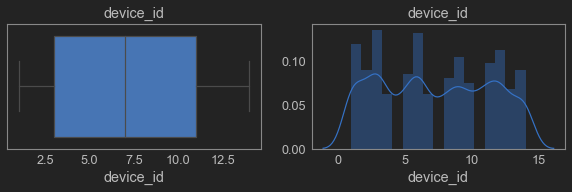

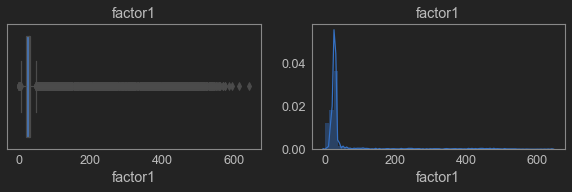

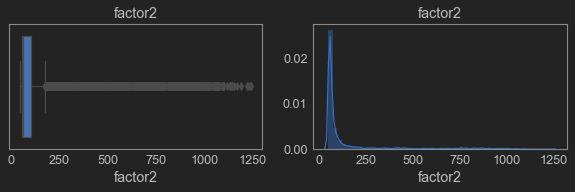

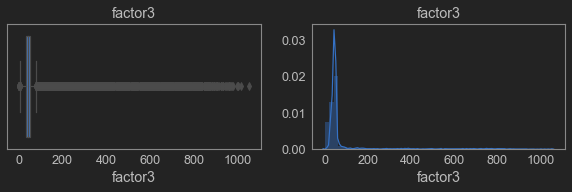

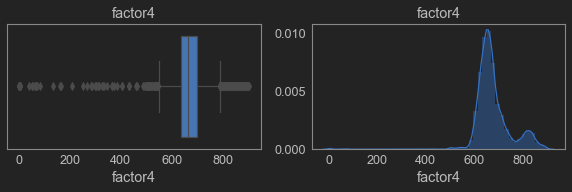

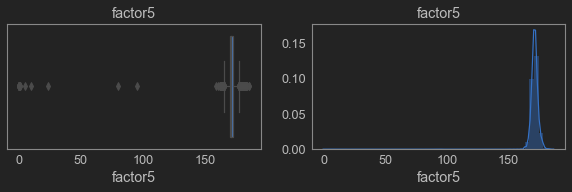

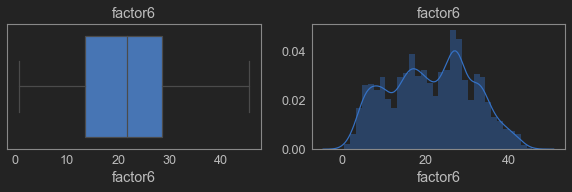

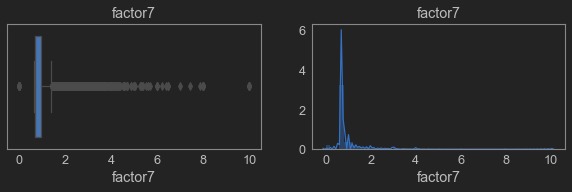

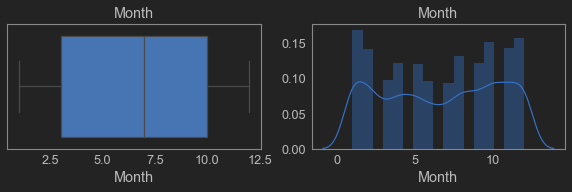

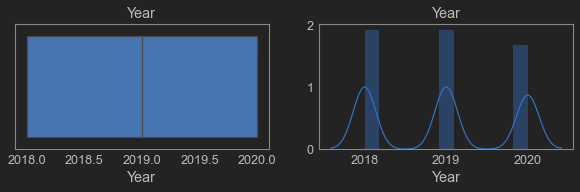

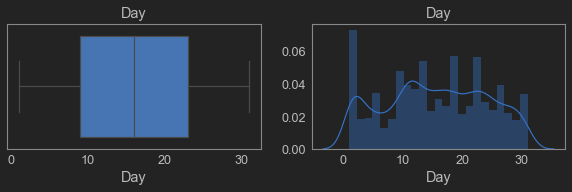

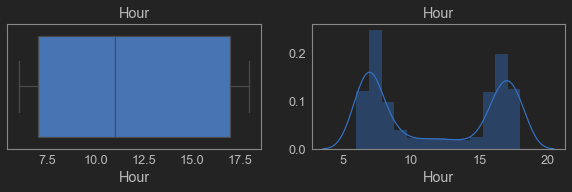

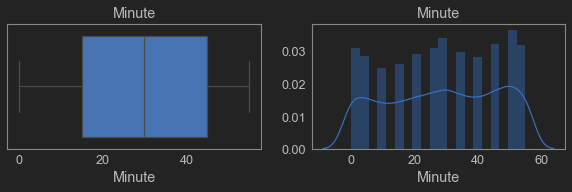

In [4]:
#Selecting the numeric columns for checking outlier and distribution 
num_cols=df.select_dtypes(include=[np.number])

for y in num_cols:
    sp_place=1
    plt.figure(figsize=(10,30))
    plt.subplot(11,2,sp_place)
    plt.title(y)
    sns.boxplot( df[y])
    plt.subplot(11,2,sp_place+1)
    plt.title(y)
    sns.distplot(df[y])
    sp_place+=1

### Handling skewness

In [5]:
#Function to normalize the features
def normalize(col):
    upper=col.max()
    lower=col.min()
    result= (col- lower)/ (upper - lower)
    return result

print('Skewness of the data :\n',df.skew())

#Transformation that reduces the skewness in the feature
df.factor5=normalize((df.factor5)**10)
df.factor4=normalize((df.factor4)**2)
df.factor6=(df.factor6)**2
df.factor2=np.log2(df.factor2)
df.factor1=np.sqrt(df.factor1)       
df.factor3=(df.factor3)**(1/3)
df.factor7=np.sqrt(df.factor7)      


print('\nSkewness after tranformations :\n',df.skew())

Skewness of the data :
 device_id     0.057499
factor1       3.291930
factor2       2.625503
factor3       3.428130
factor4      -0.967062
factor5     -15.468073
factor6      -0.018490
factor7       3.986622
Month        -0.068608
Year          0.082145
Day          -0.036041
Hour          0.074001
Minute       -0.098355
dtype: float64

Skewness after tranformations :
 device_id    0.057499
factor1      1.955502
factor2      1.679193
factor3      1.516970
factor4      0.928162
factor5      0.121090
factor6      0.723455
factor7      1.073561
Month       -0.068608
Year         0.082145
Day         -0.036041
Hour         0.074001
Minute      -0.098355
dtype: float64


### Handling outliers

In [6]:
#Removing outliers
z_score=zscore(num_cols)
abs_z_scores = np.abs(z_score)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df[filtered_entries]
data = new_df

#Modifying the data for better readability
data=data.sample(frac=1) # shuffling since it is arranged in order (device_id)
data=data.reset_index(drop=True)
data.fault_class.replace({'no':0, 'yes':1}, inplace=True)
data=pd.get_dummies(data, drop_first=True)
print('Data after performing transformations & outliers')
data


Data after performing transformations & outliers


,date_time,device_id,factor1,factor2,factor3,factor4,factor5,factor6,factor7,fault_class,...,Minute,fault_name_Inverter Status Alarm,fault_name_Invertrer DC Status,fault_name_Message Fault 1,fault_name_Message Fault 2,fault_name_Message Fault 3,fault_name_Message Fault 4,fault_name_Message Fault 5,fault_name_Message Fault 6,fault_name_Message Fault 7
0,2018-12-21 08:00:00,2,0.000000,5.964930,1.721301,0.946508,0.474562,3.865156,0.814408,1,...,0,1,0,0,0,0,0,0,0,0
1,2018-12-25 10:40:00,5,0.000000,7.350232,0.584804,0.425036,0.471815,57.168719,0.818756,1,...,40,1,0,0,0,0,0,0,0,0
2,2020-10-01 08:25:00,2,0.316228,8.055300,1.866256,0.954059,0.350002,28.302402,0.848981,1,...,25,0,0,0,0,0,1,0,0,0
3,2020-06-08 18:25:00,9,5.385165,6.300116,3.644308,0.492606,0.474562,1131.380603,1.146373,0,...,25,1,0,0,0,0,0,0,0,0
4,2019-01-16 08:05:00,11,4.929503,5.946500,3.295801,0.586997,0.433982,11.155599,0.826073,0,...,5,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8312,2018-04-28 06:50:00,9,5.839521,5.930737,3.798337,0.498371,0.472729,655.360000,1.414214,0,...,50,1,0,0,0,0,0,0,0,0
8313,2019-11-22 16:10:00,12,5.468089,5.729738,3.572632,0.541941,0.384990,537.312414,0.848877,0,...,10,1,0,0,0,0,0,0,0,0
8314,2019-08-27 18:15:00,5,5.253570,5.879317,3.527672,0.482868,0.321765,1088.868077,0.847128,0,...,15,1,0,0,0,0,0,0,0,0
8315,2018-04-28 18:10:00,6,4.816638,5.882643,3.481535,0.474293,0.451225,1332.250000,0.000000,0,...,10,1,0,0,0,0,0,0,0,0


### Splitting of data

In [7]:
#features and labels
X= data.drop('fault_class', axis=1)
y= data.fault_class

#train and test split
X_train,X_test,y_train,y_test=train_test_split(X,y , test_size=0.2, random_state=10)
train_date_time=X_train.date_time
test_date_time=X_test.date_time
test_date_time=test_date_time.reset_index(drop=True)
train_date_time=test_date_time.reset_index(drop=True)
X_train.drop('date_time', axis=1, inplace=True)
X_test.drop('date_time', axis=1, inplace=True)

C:\Users\User\Anaconda3\envs\venv\lib\site-packages\pandas\core\frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Handling Imbalance

In [8]:
#Calculating the imbalance (before resampling)
unique, count=np.unique(y_train, return_counts=True)
y_train_value_counts={k:v for (k,v) in zip(unique, count)}
print('Fault Class before resampling :',y_train_value_counts)

Fault Class before resampling : {0: 5786, 1: 867}


In [9]:
#Undersampling 
u_samp=NearMiss( sampling_strategy='majority', version=3)
X_train_res, y_train_res=u_samp.fit_sample(X_train, y_train)
train_data=pd.concat([X_train_res, y_train_res], axis=1)
train_data                     

,device_id,factor1,factor2,factor3,factor4,factor5,factor6,factor7,Month,Year,...,fault_name_Inverter Status Alarm,fault_name_Invertrer DC Status,fault_name_Message Fault 1,fault_name_Message Fault 2,fault_name_Message Fault 3,fault_name_Message Fault 4,fault_name_Message Fault 5,fault_name_Message Fault 6,fault_name_Message Fault 7,fault_class
0,11,15.234829,8.877944,7.282337,0.479184,0.643702,2063.794118,1.419594,1,2019,...,1,0,0,0,0,0,0,0,0,0
1,3,5.504544,6.085339,3.770407,0.482868,0.578072,1889.814794,1.358013,10,2019,...,1,0,0,0,0,0,0,0,0,0
2,9,5.186521,5.916931,3.636763,0.445773,0.560766,1561.909434,1.359003,5,2019,...,1,0,0,0,0,0,0,0,0,0
3,3,5.147815,5.916931,3.598559,0.506844,0.535680,1561.909434,1.359003,5,2019,...,1,0,0,0,0,0,0,0,0,0
4,4,5.612486,5.761303,3.864191,0.452895,0.393438,1781.515279,0.846978,11,2019,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1729,11,0.000000,6.287334,1.626133,0.679220,0.734794,1632.725770,1.635207,5,2020,...,1,0,0,0,0,0,0,0,0,1
1730,4,0.000000,5.672633,1.409460,0.863567,0.356336,43.059841,0.850685,12,2019,...,1,0,0,0,0,0,0,0,0,1
1731,8,0.000000,5.910400,1.338866,0.770572,0.446857,759.553571,1.373914,7,2019,...,0,0,0,0,0,0,0,0,0,1
1732,5,0.000000,5.721737,0.464159,0.854131,0.377452,59.783822,0.852846,12,2019,...,1,0,0,0,0,0,0,0,0,1


In [10]:
#Calculating the imbalance (After resampling)
unique, count=np.unique(y_train_res, return_counts=True)
y_train_value_counts_res={k:v for (k,v) in zip(unique, count)}
print('Fault class after resampling',y_train_value_counts_res)


Fault class after resampling {0: 867, 1: 867}


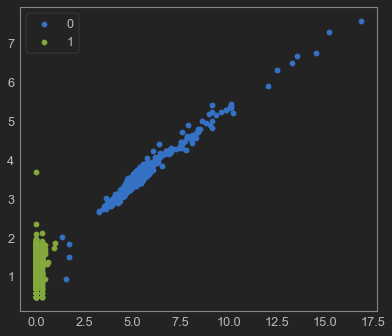

In [11]:
#Visulaization of resampled data 
for fault_class in train_data.fault_class.unique():
    resamp=train_data.loc[train_data.fault_class== fault_class]
    plt.scatter(resamp.factor1, resamp.factor3, label=str(fault_class))
    
plt.legend()
plt.show()

In [12]:
#length of common rows in training and test data 
dup=X_train_res.merge(X_test, how='inner', indicator=False)
len(dup)

0

### Corealation after feature engineering

<AxesSubplot:title={'left':'Correlation with fault class'}>

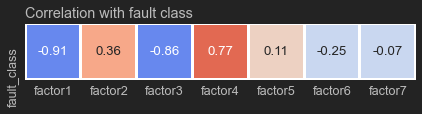

In [13]:
plt.figure(figsize=(7,7))
corr=train_data.corr(method='spearman')
cmap=sns.color_palette("coolwarm")
plt.title('Correlation with fault class', loc='left')
sns.heatmap(corr.iloc[22:,1:8], annot=True, fmt=".2f", 
           linewidths=2, cmap=cmap, vmin=-1, vmax=1, 
           cbar=False, square=True )


### Outlier & Distribution after feature engineering 

C:\Users\User\Anaconda3\envs\venv\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


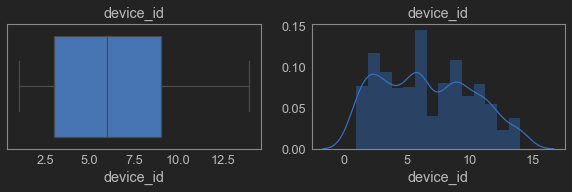

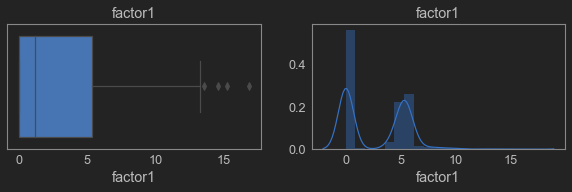

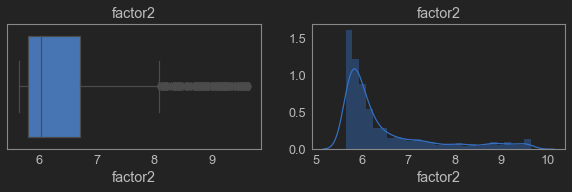

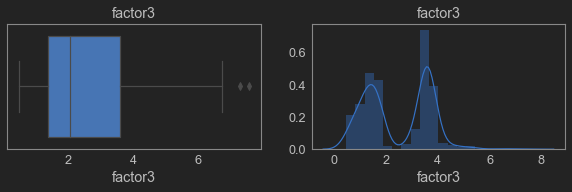

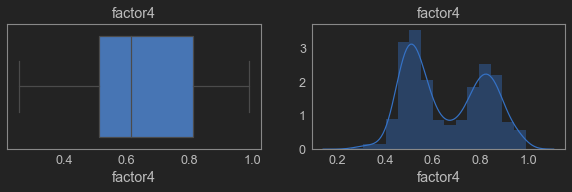

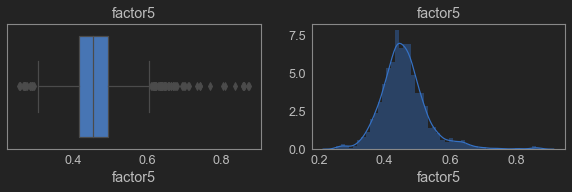

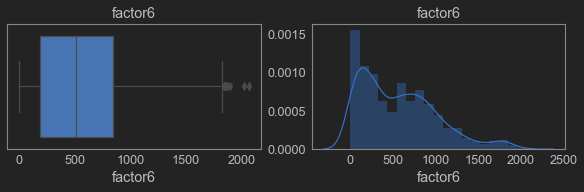

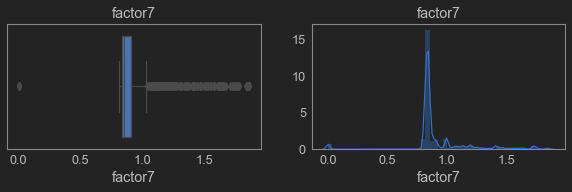

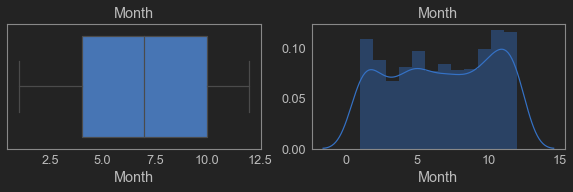

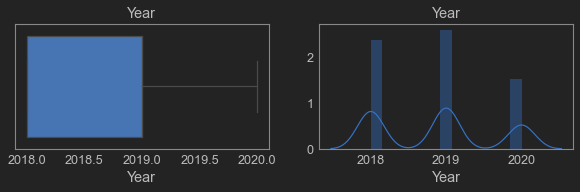

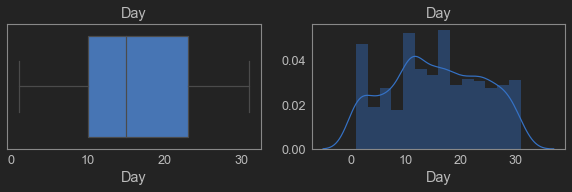

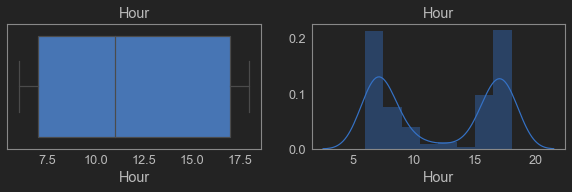

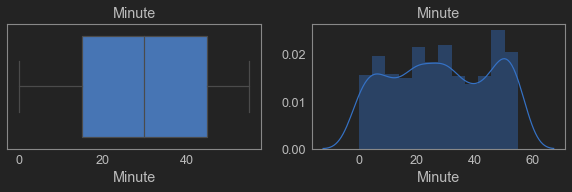

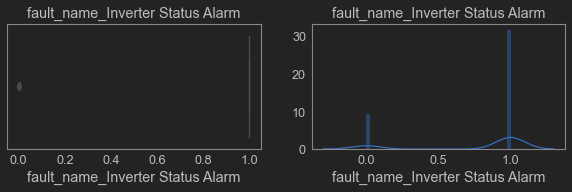

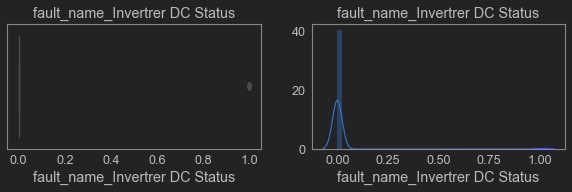

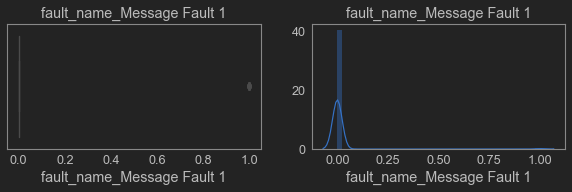

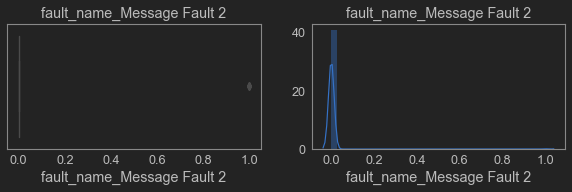

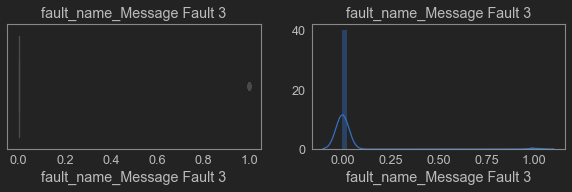

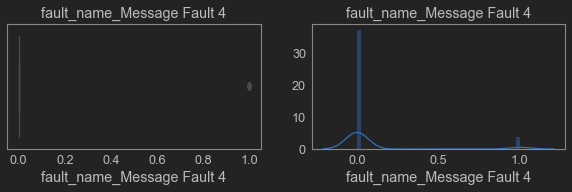

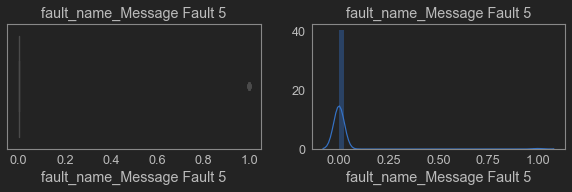

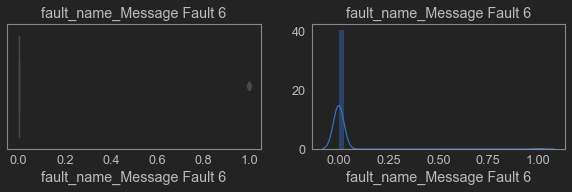

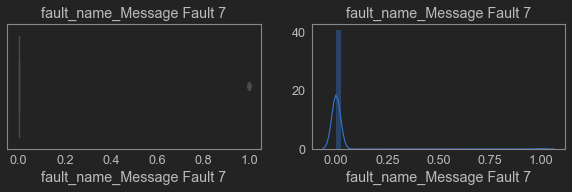

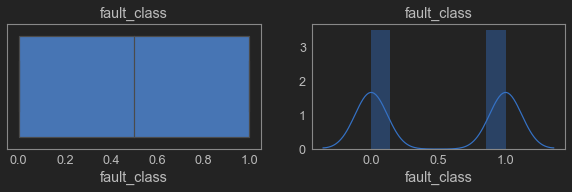

In [14]:
num=train_data.select_dtypes(include=['number'])
for y in num:
    sp_place=1
    plt.figure(figsize=(10,30))
    plt.subplot(11,2,sp_place)
    plt.title(y)
    sns.boxplot(train_data[y])
    plt.subplot(11,2,sp_place+1)
    plt.title(y)
    sns.distplot(train_data[y])
    sp_place+=1

### Classification model

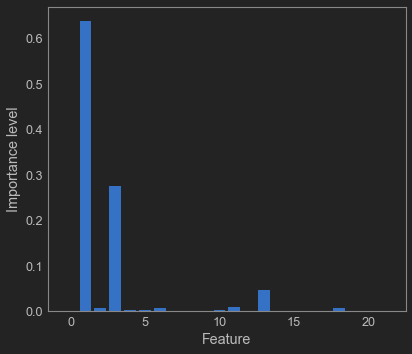

In [15]:
#Classifier model
model=RandomForestClassifier(n_estimators=10, random_state=10)
model.fit(X_train_res, y_train_res)

# plot feature importance
importance=model.feature_importances_
plt.xlabel('Feature')
plt.ylabel('Importance level')
plt.bar([x for x in range(len(importance))], importance)
plt.show()


In [16]:
#predicting
y_pred=model.predict(X_test)
probability=model.predict_proba(X_test)[:,0]

confusion matrix 
 [[1436    2]
 [   0  226]]
Accuracy  = 0.9987980769230769
Precision = 0.9912280701754386
Recall    = 1.0
F1 Score  = 0.9955947136563876


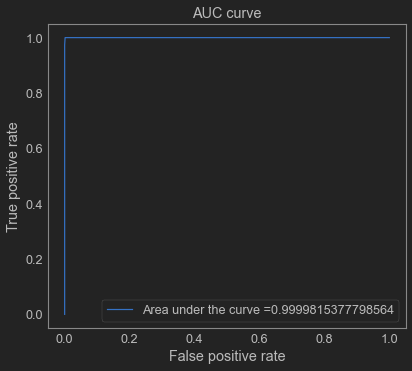

In [17]:
#Functions for generating measures

def generate_model_report(y_actual, y_predicted):
    print('confusion matrix \n', confusion_matrix(y_actual, y_predicted))
    print('Accuracy  =', accuracy_score(y_actual, y_predicted))
    print('Precision =', precision_score(y_actual, y_predicted))
    print('Recall    =', recall_score(y_actual, y_predicted))
    print('F1 Score  =', f1_score(y_actual, y_predicted))
    

def generate_roc_auc_curve(model, X_test):
    y_pred_proba=model.predict_proba(X_test)[:,1]
    fpr, tpr, threshold=roc_curve(y_test, y_pred_proba)
    auc=roc_auc_score(y_test, y_pred_proba)
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('AUC curve')
    plt.plot(fpr, tpr, label='Area under the curve ='+str(auc))
    plt.legend()
    plt.show()
    
    
generate_model_report(y_test, y_pred)
generate_roc_auc_curve(model, X_test)

### Hyperparameter tuning

In [18]:
params={'n_estimators':[int(x) for x in np.linspace(10,100, 5)],
            'max_depth':[int(x) for x in np.linspace(1, 15, 2)],
            'max_features':['sqrt', 'log2']}

In [19]:
hyp_tun=GridSearchCV(estimator=model, param_grid=params).fit(X_train_res, y_train_res)
hyp_tun.best_params_

{'max_depth': 1, 'max_features': 'sqrt', 'n_estimators': 10}

### Output file

In [27]:
predicted=pd.Series(y_pred, name='fault_class(predicted)')
prob_pred=pd.Series(probability, name='probability_of_prediction')
req_fields=pd.Series(X_test['device_id'], name='device_id')
req_fields=req_fields.reset_index(drop=True)
actual=y_test.reset_index(drop=True)
result=pd.concat([test_date_time,req_fields,actual,predicted,prob_pred], axis=1)
result.rename(columns={'fault_class':'fault_class(actual)'}, inplace=True)
result=result.sort_values('device_id')
result=result.reset_index(drop=True)
result.to_csv('./Fault_Classification/result(fault_classification).csv',index=False)
result

,date_time,device_id,fault_class(actual),fault_class(predicted),probability_of_prediction
0,2020-04-02 07:55:00,1,0,0,1.0
1,2018-08-12 07:45:00,1,1,1,0.0
2,2020-11-14 07:55:00,1,0,0,1.0
3,2019-11-01 08:25:00,1,0,0,0.9
4,2019-03-31 06:50:00,1,0,0,1.0
...,...,...,...,...,...
1659,2019-12-23 16:55:00,14,0,0,1.0
1660,2020-01-22 17:25:00,14,0,0,1.0
1661,2018-02-12 16:55:00,14,0,0,1.0
1662,2018-01-19 17:15:00,14,0,0,1.0
